In [1]:
from catinous.dataset import BatchDataset, ContinuousDataset
from catinous.dynamicmemory.DynamicMemoryModel import DynamicMemoryModel 
import catinous.dynamicmemory.DynamicMemoryModel as dmodel
import catinous.utils as cutils
import os
import pandas as pd
from py_jotools import mut, slurm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
#import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import torchvision.models as models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from catinous.dataset.ContinuousDataset import *
from catinous.dataset.BatchDataset import *
from torch.utils.data import DataLoader
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import catinous.evalfunctions as evalfu
import pydicom as pyd

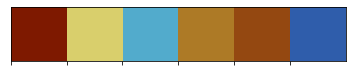

In [2]:
mapname = 'roma'

cm_data = np.loadtxt(f"/home/mperkonigg/Documents/ScientificColourMaps6/{mapname}/{mapname}.txt")
#colormap = LinearSegmentedColormap.from_list('scientific_cm', cm_data)
#x = np.linspace(0, 100, 25)[None, :]
#plt.imshow(x, aspect='auto',cmap=colormap)
#plt.axis('off')
#plt.show()
colormap = ListedColormap([cm_data[0], cm_data[85],cm_data[180], cm_data[45], cm_data[20], cm_data[227]], name='scientific_cm')
matplotlib.cm.register_cmap(cmap=colormap, name='scientific_cm')
sns.set_palette('scientific_cm')
sns.palplot(sns.color_palette())

In [5]:
ds = LIDCBatch('/project/catinous/lungnodulesfinallndbBig.csv', split='test', validation=True)
data = ds[-5]
img = data[0]
gt = data[1]['boxes'][0]

(1, 512, 640)


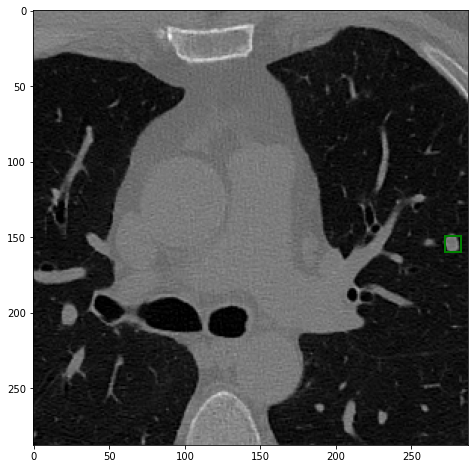

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))
ax.imshow(img[0])
rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
ax.add_patch(rect)

In [3]:
seeds = [1654130, 6654961, 5819225, 1215862, 132054]

hparams_naive = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':False,
         'random_memory': True,
         'balance_memory': False,
        'order': ['ges', 'geb', 'sie', 'lndb'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinallndbBig_base_1_8886916fcd.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130
        }


hparams_128_PD = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
        'order': ['ges', 'geb', 'sie', 'lndb'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinallndbBig_base_1_8886916fcd.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0,
         'pseudodomain_detection': True
        }


hparams_64_PD = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
        'order': ['ges', 'geb', 'sie', 'lndb'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinallndbBig_base_1_8886916fcd.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0,
         'pseudodomain_detection': True
        }

hparams_64_DM = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
        'order':  ['ges', 'geb', 'sie', 'lndb'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinallndbBig_base_1_8886916fcd.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0
        }

hparams_128_DM = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
        'order':  ['ges', 'geb', 'sie', 'lndb'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinallndbBig_base_1_8886916fcd.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0
        }

In [122]:
def res_data_for_params(hparams, seeds=None):
    df = pd.DataFrame()
    hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
    if seeds is None:        
        exp_name = cutils.get_expname(hparams)

        max_version = max([int(x.split('_')[1]) for x in os.listdir(cutils.LOGGING_FOLDER + exp_name)])
        df_temp = pd.read_csv(cutils.LOGGING_FOLDER + exp_name + '/version_{}/metrics.csv'.format(max_version))

        df_temp = df_temp.loc[df_temp['val_ap_geb']==df_temp['val_ap_geb']]
        df_temp['idx'] = range(1,len(df_temp)+1)
        df = df.append(df_temp)
    else:
        for i, seed in enumerate(seeds):
            hparams['seed'] = seed
            hparams['run_postfix'] = i+1
            exp_name = cutils.get_expname(hparams)
            max_version = max([int(x.split('_')[1]) for x in os.listdir(cutils.LOGGING_FOLDER + exp_name)])
            df_temp = pd.read_csv(cutils.LOGGING_FOLDER + exp_name + '/version_{}/metrics.csv'.format(max_version))

            df_temp = df_temp.loc[df_temp['val_ap_geb']==df_temp['val_ap_geb']]
            df_temp['idx'] = range(1,len(df_temp)+1)
            df = df.append(df_temp)
    #if os.path.exists(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv'):
    #    df_mem = pd.read_csv(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv')
    #else:
    #    print(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv', 'not existing')
    #    df_mem = None

    return df#, df_mem

ds = LIDCContinuous('/project/catinous/lungnodulesfinallndbBig.csv', seed=seeds[3], order=['ges', 'geb', 'sie', 'lndb'], transition_phase_after=0.8)
res = ds.df.scanner == 'ges'
res1 = ds.df.scanner == 'geb'
res2 = ds.df.scanner == 'sie'
res3 = ds.df.scanner == 'lndb'
res[res1] = 2
res[res2] = 3
res[res3] = 4

['ges', 'geb', 'sie', 'lndb']


In [123]:
np.where(res==3)

(array([283, 288, 290, 291, 292, 296, 297, 298, 299, 300, 304, 306, 307,
        309, 311, 313, 315, 316, 317, 318, 319, 320, 321, 322, 324, 325,
        326, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339,
        340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,
        353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365,
        366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378,
        379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391,
        392, 393, 396, 398, 399, 400, 404, 406, 407, 408]),)

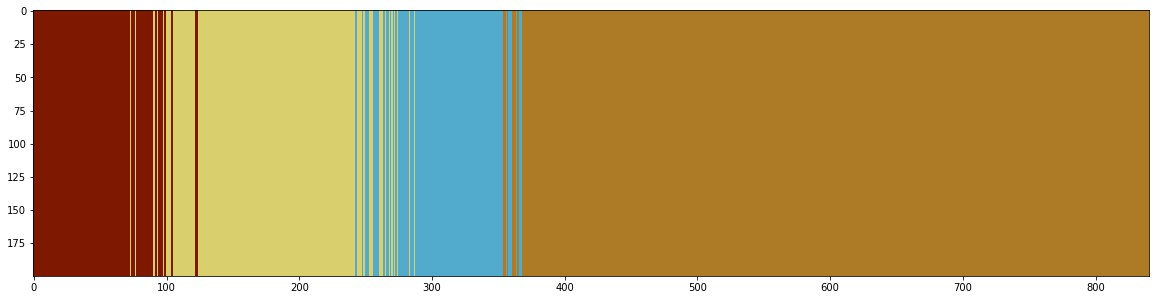

In [130]:
plt.figure(figsize=(20, 10))
plt.imshow(np.tile(res[40:],(200,1)), cmap=ListedColormap(colormap.colors[:4]))
plt.savefig(cutils.RESPATH + 'naturecomm_figures/timeline.pdf')

In [19]:
hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
         'batch_size': 4,
         'training_batch_size': 8,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
        'order': ['ges', 'geb', 'sie'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'lidc_batch_lungnodulesfinalpatientsplit_base_1_4e9eb3ca65.pt', 
         'run_postfix': 1,
        'dim': 2,
         'task': 'lidc',
         'model': 'rnn',
         'seed': 1654130,
         'stylemodel': True,
         'gram_weights': [1, 1],
         'force_misclassified': True,
         'misclass_threshold': 0,
         'pseudodomain_detection': True
        }

seeds = [1654130, 6654961, 5819225, 1215862, 132054]
df = res_data_for_params(hparams, seeds=seeds)

In [138]:
hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
exp_name = cutils.get_expname(hparams)

max_version = max([int(x.split('_')[1]) for x in os.listdir(cutils.LOGGING_FOLDER + exp_name)])
df_temp = pd.read_csv(cutils.LOGGING_FOLDER + exp_name + '/version_{}/metrics.csv'.format(max_version))

df_temp = df_temp.loc[df_temp['val_ap_geb']==df_temp['val_ap_geb']]
df_temp['idx'] = range(1,len(df_temp)+1)
df_temp

,created_at,epoch,train_loss,val_ap_geb,val_ap_ges,val_ap_lndb,val_ap_sie,idx
0,2021-02-05 11:11:59.690241,NaN,NaN,0.403243,0.612775,0.131032,0.599650,1
1,2021-02-05 11:12:17.556891,NaN,NaN,0.383242,0.624482,0.122947,0.593357,2
2,2021-02-05 11:12:36.022746,NaN,NaN,0.451147,0.631392,0.133659,0.646743,3
3,2021-02-05 11:12:55.494591,NaN,NaN,0.369875,0.563636,0.122009,0.628596,4
5,2021-02-05 11:13:14.147417,NaN,NaN,0.533206,0.654639,0.140875,0.723026,5
6,2021-02-05 11:13:31.650591,NaN,NaN,0.675144,0.654670,0.203503,0.826203,6
7,2021-02-05 11:13:50.500482,NaN,NaN,0.722216,0.652922,0.219549,0.739538,7
8,2021-02-05 11:14:08.270456,NaN,NaN,0.652547,0.694519,0.199590,0.761364,8
9,2021-02-05 11:14:26.382407,NaN,NaN,0.658807,0.645610,0.181718,0.750000,9
11,2021-02-05 11:14:45.777737,NaN,NaN,0.675732,0.666827,0.200910,0.819805,10


In [139]:
exp_name

'lidc_cont_lungnodulesfinallndbBig_basemodel_batch_mem_tf08_1_580ba215d9'

/project/catinous/trained_models/lidc_cont_lungnodulesfinallndbBig_basemodel_batch_mem_tf08_1_adf8e31abd.pt
/project/catinous/trained_models/lidc_cont_lungnodulesfinallndbBig_basemodel_batch_mem_tf08_1_580ba215d9.pt


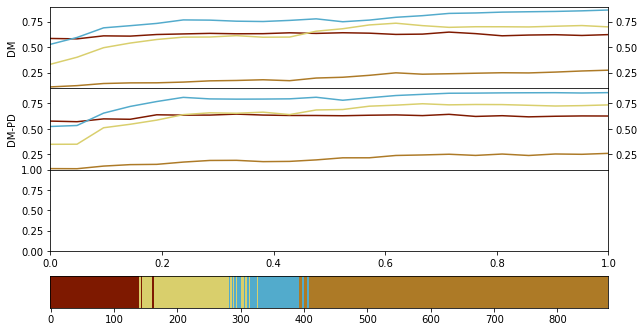

In [135]:
val_measure = 'val_ap'
fig, axes = plt.subplots(4, 1, figsize=(10, 6))
plt.subplots_adjust(hspace=0.0)

names = ['DM', 'DM-PD', 'Naive']
seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i, hparams in enumerate([hparams_128_lndb_DM, hparams_128_lndb_PD]):
    df = res_data_for_params(hparams, seeds=seeds)

    ax = axes[i]
    for scanner in hparams['order']:
        sns.lineplot(data=df, y=f'{val_measure}_{scanner}', x='idx', err_style=None, ax=ax, label=scanner)
    ax.set_ylim(0.10, 0.9)
    ax.set_yticks([0.25, 0.50, 0.75])
    ax.get_xaxis().set_visible(False)
    ax.get_legend().remove()
    ax.set_xlim(1, 22)
    ax.set_ylabel(names[i])
    ax.tick_params(labelright=True, right=True)

axes[-1].imshow(np.tile(res,(50,1)), cmap=ListedColormap(colormap.colors[:4]))
axes[-1].get_yaxis().set_visible(False)
axes[-1].get_yaxis()
#plt.savefig(cutils.RESPATH + 'naturecomm_figures/lidc_validationcurves_naiveupdate.pdf')

In [4]:
df_overall = pd.DataFrame()

In [ ]:
df_overview = df_overall.groupby(['model', 'scanner']).mean().reset_index()
df_overview.pivot(index='model', columns='scanner', values='mean').round(3)

In [32]:
hparams_set = [hparams_naive, hparams_128_DM, hparams_128_PD, hparams_64_DM, hparams_64_PD, hparams_DM_WOTIME, hparams_PD_WOTIME]

names = ['Naive', '128 DM', '128 PD', '64 DM', '64 PD', 'DM WO TIME', 'PD WO TIME']

#hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)

df_overall = pd.DataFrame()

for k, hparams in enumerate(hparams_set):
    print(names[k])
    df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams)}_meanaverageprecision.csv')
    for seed in seeds:
        df_bwt_fwt = df_res.loc[df_res.seed==seed].reset_index(drop=True)
        if names[k] == 'DM WO TIME' or names[k] == 'PD WO TIME':
            order=['ges', 'geb', 'sie']
        else:
            order = ['ges', 'geb', 'sie', 'time_siemens']
        bwt = 0.0
        fwt = 0.0

        for i in range(len(order)-1):
            bwt += df_bwt_fwt.loc[df_bwt_fwt['shift']=='None'][order[i]].values[0] - df_bwt_fwt.loc[df_bwt_fwt['shift']==order[i+1]][order[i]].values[0]
        if names[k] == 'DM WO TIME' or names[k] == 'PD WO TIME':
            order=['ges', 'geb', 'sie', 'None']
        else:
            order = ['ges', 'geb', 'sie', 'time_siemens', 'None']

        for i in range(2, len(order)):
            fwt += df_bwt_fwt.loc[df_bwt_fwt['shift']==order[i]][order[i-1]].values[0] - df_bwt_fwt.loc[df_bwt_fwt['shift']==order[1]][order[i-1]].values[0]

        bwt /= len(order)-1
        fwt /= len(order)-1
        df_res = df_res.append(pd.DataFrame({'shift':['BWT', 'FWT'], 
                                    'ges':[bwt, fwt], 
                                    'geb':[0, 0], 
                                    'sie':[0, 0],
                                    'time_siemens':[0, 0]}))

    df_res['name'] = names[k]

    df_overall = df_overall.append(df_res)

Naive
128 DM
128 PD
64 DM
64 PD
DM WO TIME
PD WO TIME


In [33]:
df_overall.groupby(['shift', 'name']).mean().round(3)[['ges', 'geb', 'sie', 'time_siemens']]

ges    geb    sie  time_siemens
shift        name                                         
BWT          128 DM      0.034  0.000  0.000         0.000
             128 PD      0.038  0.000  0.000         0.000
             64 DM       0.029  0.000  0.000         0.000
             64 PD       0.022  0.000  0.000         0.000
             DM WO TIME  0.003  0.000  0.000         0.000
             Naive      -0.019  0.000  0.000         0.000
             PD WO TIME  0.007  0.000  0.000         0.000
FWT          128 DM      0.041  0.000  0.000         0.000
             128 PD      0.042  0.000  0.000         0.000
             64 DM       0.041  0.000  0.000         0.000
             64 PD       0.033  0.000  0.000         0.000
             DM WO TIME  0.051  0.000  0.000         0.000
             Naive       0.056  0.000  0.000         0.000
             PD WO TIME  0.060  0.000  0.000         0.000
None         128 DM      0.690  0.476  0.698         0.250
             128 PD      0.691  0.519  0.703         0.269
             64 DM       0.666  0.504  0.720         0.246
             64 PD       0.653  0.501  0.690         0.249
             DM WO TIME  0.810  0.471  0.663           NaN
             Naive       0.577  0.511  0.608         0.260
             PD WO TIME  0.812  0.516  0.665           NaN
geb          128 DM      0.663  0.261  0.676         0.215
             128 PD      0.674  0.259  0.706         0.221
             64 DM       0.669  0.279  0.682         0.226
             64 PD       0.666  0.286  0.703         0.219
             DM WO TIME  0.794  0.388  0.598           NaN
             Naive       0.662  0.240  0.706         0.200
             PD WO TIME  0.800  0.405  0.584           NaN
sie          128 DM      0.682  0.373  0.674         0.266
             128 PD      0.689  0.379  0.729         0.261
             64 DM       0.695  0.385  0.721         0.275
             64 PD       0.688  0.377  0.705         0.284
             DM WO TIME  0.810  0.477  0.617           NaN
             Naive       0.695  0.410  0.728         0.298
             PD WO TIME  0.812  0.505  0.610           NaN
time_siemens 128 DM      0.687  0.387  0.692         0.250
             128 PD      0.704  0.401  0.708         0.250
             64 DM       0.701  0.390  0.718         0.235
             64 PD       0.686  0.390  0.714         0.240
             Naive       0.690  0.420  0.700         0.281

In [11]:
df_res.groupby('shift').mean().round(3)

,geb,ges,sie,time_siemens,seed
shift,,,,,
BWT,0.000,0.038,0.000,0.000,NaN
FWT,0.000,0.042,0.000,0.000,NaN
None,0.519,0.691,0.703,0.269,3095246.4
geb,0.259,0.674,0.706,0.221,3095246.4
sie,0.379,0.689,0.729,0.261,3095246.4
time_siemens,0.401,0.704,0.708,0.250,3095246.4


In [19]:
hparams_set = [hparams_lndb_naive, hparams_128_lndb_DM, hparams_128_lndb_PD, hparams_64_lndb_DM, hparams_64_lndb_PD]

names = ['Naive', '128 DM', '128 PD', '64 DM', '64 PD']

#hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)

df_overall = pd.DataFrame()

for k, hparams in enumerate(hparams_set):
    print(names[k])
    df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams)}_meanaverageprecision.csv')
    for seed in seeds:
        df_bwt_fwt = df_res.loc[df_res.seed==seed].reset_index(drop=True)

        order = ['ges', 'geb', 'sie', 'lndb']
        bwt = 0.0
        fwt = 0.0

        for i in range(len(order)-1):
            bwt += df_bwt_fwt.loc[df_bwt_fwt['shift']=='None'][order[i]].values[0] - df_bwt_fwt.loc[df_bwt_fwt['shift']==order[i+1]][order[i]].values[0]

        order = ['ges', 'geb', 'sie', 'lndb', 'None']

        for i in range(2, len(order)):
            fwt += df_bwt_fwt.loc[df_bwt_fwt['shift']==order[i]][order[i-1]].values[0] - df_bwt_fwt.loc[df_bwt_fwt['shift']==order[1]][order[i-1]].values[0]

        bwt /= len(order)-1
        fwt /= len(order)-1
        df_res = df_res.append(pd.DataFrame({'shift':['BWT', 'FWT'], 
                                    'ges':[bwt, fwt], 
                                    'geb':[0, 0], 
                                    'sie':[0, 0],
                                    'lndb':[0, 0]}))

    df_res['name'] = names[k]

    df_overall = df_overall.append(df_res)

Naive
128 DM
128 PD
64 DM
64 PD


In [35]:
hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams_joint_lndb)
df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams)}_meanaverageprecision.csv')
df_res.mean().round(3), df_res.std().round(3)

(geb     0.598
 ges     0.714
 lndb    0.375
 sie     0.770
 dtype: float64,
 geb     0.036
 ges     0.044
 lndb    0.021
 sie     0.024
 dtype: float64)

In [8]:
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
    'batch_size': 8,
    'training_batch_size': 8,
    'task': 'lidc',
    'model': 'rnn',
    'scanner': 'ges',
    'val_check_interval': 50,
     'noncontinuous_steps': 1000,
    'noncontinuous_train_splits': ['base'],
    'order': ['ges', 'geb', 'sie', 'lndb'],
    'use_memory': False
}
hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams)}_meanaverageprecision.csv')
df_res.mean().round(3), df_res.std().round(3)

(ges     0.645
 geb     0.372
 sie     0.509
 lndb    0.136
 dtype: float64,
 ges    NaN
 geb    NaN
 sie    NaN
 lndb   NaN
 dtype: float64)

In [6]:
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
    'batch_size': 8,
    'training_batch_size': 8,
    'task': 'lidc',
    'model': 'rnn',
    'scanner': None,
     'noncontinuous_steps': 3001,
    'noncontinuous_train_splits': ['base', 'train'],
    'order': ['ges', 'geb', 'sie', 'lndb'],
    'use_memory': False,
    'val_check_interval': 50
}

hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams)}_meanaverageprecision.csv')
df_res.mean().round(3), df_res.std().round(3)

(geb     0.542
 ges     0.736
 lndb    0.431
 sie     0.718
 dtype: float64,
 geb     0.044
 ges     0.011
 lndb    0.037
 sie     0.082
 dtype: float64)

In [5]:
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/lungnodulesfinallndbBig.csv',
    'batch_size': 8,
    'training_batch_size': 8,
    'task': 'lidc',
    'model': 'rnn',
    'scanner': None,
     'noncontinuous_steps': 3000,
    'noncontinuous_train_splits': ['base', 'train'],
    'order': ['ges', 'geb', 'sie', 'lndb'],
    'use_memory': False,
    'val_check_interval': 50
}

for scanner in [None, 'ges', 'geb', 'sie', 'lndb']:
    print(scanner)
    hparams['scanner'] = scanner
    hparams_temp = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
    df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams_temp)}_meanaverageprecision.csv')
    print(df_res.mean().round(3))
    print(df_res.std().round(3))

None
geb     0.455
ges     0.680
lndb    0.366
sie     0.691
dtype: float64
geb     0.124
ges     0.101
lndb    0.110
sie     0.109
dtype: float64
ges
geb     0.393
ges     0.685
lndb    0.164
sie     0.777
dtype: float64
geb     0.040
ges     0.028
lndb    0.024
sie     0.045
dtype: float64
geb
geb     0.500
ges     0.461
lndb    0.230
sie     0.558
dtype: float64
geb     0.049
ges     0.057
lndb    0.017
sie     0.040
dtype: float64
sie
geb     0.248
ges     0.459
lndb    0.145
sie     0.561
dtype: float64
geb     0.054
ges     0.087
lndb    0.009
sie     0.126
dtype: float64
lndb
geb     0.502
ges     0.580
lndb    0.454
sie     0.651
dtype: float64
geb     0.145
ges     0.077
lndb    0.096
sie     0.121
dtype: float64


In [92]:
df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams_lndb_naive)}_meanaverageprecision.csv')
df_res.mean().round(3), df_res.std().round(3)

(geb           0.335
 ges           0.594
 lndb          0.158
 sie           0.609
 seed    3095246.400
 dtype: float64,
 geb           0.156
 ges           0.198
 lndb          0.066
 sie           0.215
 seed    2694283.963
 dtype: float64)

In [84]:
hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams_single_lndb)
df_res = pd.read_csv(f'/project/catinous/results/lidc/{cutils.get_expname(hparams)}_meanaverageprecision.csv')
df_res.mean().round(3), df_res.std().round(3)

(geb     0.447
 ges     0.399
 lndb    0.317
 sie     0.509
 dtype: float64,
 geb     0.136
 ges     0.116
 lndb    0.053
 sie     0.160
 dtype: float64)

In [49]:
df_overall.groupby(['shift', 'name']).mean().round(3)[['ges', 'geb', 'sie', 'lndb']]

ges    geb    sie   lndb
shift name                              
BWT   128 DM  0.070  0.000  0.000  0.000
      128 PD  0.073  0.000  0.000  0.000
      64 DM   0.068  0.000  0.000  0.000
      64 PD  -0.009  0.000  0.000  0.000
      Naive   0.056  0.000  0.000  0.000
FWT   128 DM  0.061  0.000  0.000  0.000
      128 PD  0.070  0.000  0.000  0.000
      64 DM   0.055  0.000  0.000  0.000
      64 PD   0.059  0.000  0.000  0.000
      Naive   0.102  0.000  0.000  0.000
None  128 DM  0.741  0.544  0.758  0.269
      128 PD  0.729  0.600  0.756  0.281
      64 DM   0.729  0.571  0.744  0.276
      64 PD   0.639  0.492  0.651  0.234
      Naive   0.648  0.505  0.666  0.273
geb   128 DM  0.676  0.301  0.678  0.132
      128 PD  0.667  0.291  0.702  0.132
      64 DM   0.673  0.290  0.730  0.132
      64 PD   0.675  0.289  0.717  0.135
      Naive   0.561  0.227  0.556  0.116
lndb  128 DM  0.697  0.374  0.709  0.152
      128 PD  0.696  0.388  0.718  0.173
      64 DM   0.696  0.382  0.711  0.150
      64 PD   0.698  0.392  0.746  0.159
      Naive   0.674  0.334  0.669  0.166
sie   128 DM  0.677  0.378  0.690  0.163
      128 PD  0.698  0.409  0.714  0.188
      64 DM   0.690  0.386  0.692  0.161
      64 PD   0.676  0.397  0.718  0.175
      Naive   0.673  0.365  0.694  0.196

In [23]:
df_temp_overall = df_overall.loc[df_overall['shift']=='None']
df_temp_overall = df_temp_overall[['ges', 'geb', 'sie', 'lndb', 'name']]

In [24]:
df_temp_overall = df_temp_overall.melt(id_vars=["name"], 
        var_name="Scanner", 
        value_name="Dice")

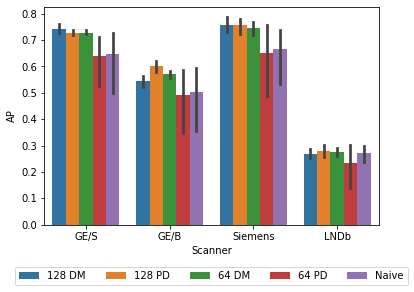

In [67]:
p = sns.barplot(data=df_temp_overall, x='Scanner', y='Dice', hue='name', palette='tab10', hue_order=['128 DM', '128 PD', '64 DM', '64 PD', 'Naive'])

p.set(ylabel='AP', xlabel='Scanner', xticklabels=['GE/S', 'GE/B', 'Siemens', 'LNDb'])
#p.legend_.set_visible(False)
p.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=5)
plt.savefig(cutils.RESPATH + 'naturecomm_figures/lungnodule_barplot.pdf')

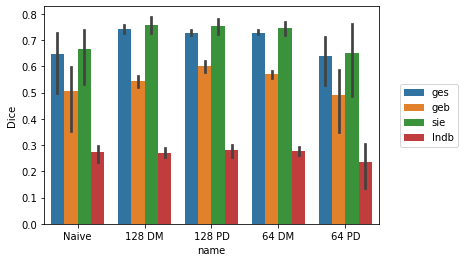

In [37]:
p = sns.barplot(data=df_temp_overall, x='name', y='Dice', hue='Scanner', palette='tab10')
p.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

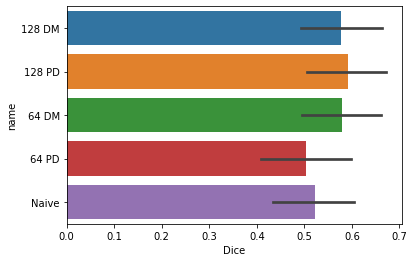

In [42]:
p = sns.barplot(data=df_temp_overall, y='name', x='Dice', palette='tab10', orient='h', order=['128 DM', '128 PD', '64 DM', '64 PD', 'Naive'])

In [16]:
df_overall.groupby(['shift', 'name']).std().round(3)[['ges', 'geb', 'sie', 'lndb']]

ges    geb    sie   lndb
shift name                              
BWT   128 DM  0.017  0.000  0.000  0.000
      128 PD  0.020  0.000  0.000  0.000
      64 DM   0.016  0.000  0.000  0.000
      Naive   0.022  0.000  0.000  0.000
FWT   128 DM  0.032  0.000  0.000  0.000
      128 PD  0.012  0.000  0.000  0.000
      64 DM   0.009  0.000  0.000  0.000
      Naive   0.046  0.000  0.000  0.000
None  128 DM  0.022  0.025  0.039  0.023
      128 PD  0.011  0.025  0.038  0.029
      64 DM   0.011  0.019  0.031  0.020
      Naive   0.165  0.167  0.148  0.043
geb   128 DM  0.026  0.050  0.048  0.028
      128 PD  0.044  0.037  0.056  0.013
      64 DM   0.017  0.023  0.050  0.009
      Naive   0.236  0.064  0.282  0.027
lndb  128 DM  0.019  0.038  0.042  0.017
      128 PD  0.014  0.036  0.030  0.002
      64 DM   0.010  0.066  0.027  0.023
      Naive   0.022  0.067  0.074  0.021
sie   128 DM  0.012  0.018  0.043  0.009
      128 PD  0.005  0.055  0.016  0.013
      64 DM   0.017  0.052  0.011  0.016
      Naive   0.054  0.095  0.054  0.015

In [35]:
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/lungnodulesfinalpatientsplit.csv',
    'batch_size': 8,
    'training_batch_size': 8,
    'task': 'lidc',
    'model': 'rnn',
    'scanner': None,
     'noncontinuous_steps': 5000,
    'noncontinuous_train_splits': ['base', 'train'],
    'order': ['ges', 'geb', 'sie', 'time_siemens'],
    'use_memory': False,
    'val_check_interval': 50
}

df_base = pd.DataFrame()
for scanner in [None, 'ges', 'geb', 'sie', 'time_siemens']:
    hparams['scanner'] = scanner
    aps = evalfu.get_ap_for_res(hparams, split='test')
    aps['scanner'] = scanner
    df_base = df_base.append(aps)

expname lidc_batch_lungnodulesfinalpatientsplit_base-train_1_ea03d7c711
Read: /project/catinous/trained_models/lidc_batch_lungnodulesfinalpatientsplit_base-train_1_ea03d7c711.pt


KeyboardInterrupt: 

In [8]:
df_base

,ges,geb,sie,time_siemens,scanner
0,0.635803,0.474892,0.705062,0.088436,None
0,0.715713,0.562492,0.710483,0.119304,ges
0,0.679698,0.572404,0.747344,0.221173,geb
0,0.759938,0.667521,0.758838,0.161504,sie
0,0.640198,0.433477,0.642496,0.290319,time_siemens


In [13]:
ds = LIDCContinuous('/project/catinous/lungnodulesfinalpatientsplit.csv', seed=1654130)
res = ds.df.scanner == 'ges'
res1 = ds.df.scanner == 'geb'
res2 = ds.df.scanner == 'sie'
res3 = ds.df.scanner == 'time_siemens'
res[res1] = 2
res[res2] = 3
res[res3] = 4

In [12]:
ds.df.loc[ds.df.scanner=='ges'].index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 122, 123, 124, 126, 127, 129, 130, 131, 133,
       135, 137, 138, 139, 142, 143])

In [ ]:
ds.df.loc[ds.df.scanner=='ges'].index.values

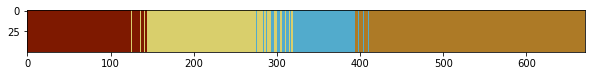

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(np.tile(res,(50,1)), cmap=ListedColormap(colormap.colors[:4]))


In [10]:
ds.df.loc[ds.df.scanner=='ges']

,dataset,scanner,patient_id,image,x1,x2,y1,y2,bin_malignancy,split
0,lidc,ges,LIDC-IDRI-0399,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,171.0,179.0,154.0,162.0,0,train
1,lidc,ges,LIDC-IDRI-0046,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,426.0,433.0,327.0,334.0,0,train
2,lidc,ges,LIDC-IDRI-0722,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,395.0,405.0,262.0,272.0,1,train
3,lidc,ges,LIDC-IDRI-0947,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,95.0,105.0,265.0,275.0,1,train
4,lidc,ges,LIDC-IDRI-0187,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,342.0,366.0,267.0,291.0,1,train
...,...,...,...,...,...,...,...,...,...,...
137,lidc,ges,LIDC-IDRI-0158,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,280.0,287.0,289.0,296.0,1,train
138,lidc,ges,LIDC-IDRI-0055,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,341.0,352.0,202.0,213.0,1,train
139,lidc,ges,LIDC-IDRI-0206,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,195.0,201.0,270.0,276.0,1,train
142,lidc,ges,LIDC-IDRI-1004,/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-...,159.0,169.0,146.0,156.0,1,train


## Memory evaluation 

In [47]:
def get_memory_dist(hparams, seeds):
    hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)

    df_mem_eval = pd.DataFrame()
    df_mems = []
    for k, seed in enumerate(seeds):
        hparams['seed'] = seed
        hparams['run_postfix'] = k+1
        exp_name = cutils.get_expname(hparams)
        if os.path.exists(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv'):
            df_mem = pd.read_csv(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv')
            df_mems.append(df_mem)
            df_mem_grp = df_mem.groupby('scanner').count().reset_index()
            df_mem_eval = df_mem_eval.append(df_mem_grp)
        else:
            print(cutils.TRAINED_MEMORY_FOLDER + exp_name + '.csv', 'not existing')
            df_mem = None
    return df_mem_eval, df_mems

In [26]:
df_mem_eval, df_mems = get_memory_dist(hparams_64_DM, seeds)
df_mem_eval.groupby('scanner').mean()

,filepath,pseudo_domain,traincounter
scanner,,,
geb,4.0,0.0,4.0
ges,31.4,0.0,31.4
sie,17.6,0.0,17.6
time_siemens,11.0,0.0,11.0


In [25]:
df_mem_eval, df_mems = get_memory_dist(hparams_64_PD, seeds)
df_mem_eval.groupby('scanner').mean()

,filepath,pseudo_domain,traincounter
scanner,,,
geb,13.4,13.4,13.4
ges,20.8,20.8,20.8
sie,15.0,15.0,15.0
time_siemens,14.8,14.8,14.8


In [27]:
df_mem_eval, df_mems = get_memory_dist(hparams_128_DM, seeds)
df_mem_eval.groupby('scanner').mean()

,filepath,traincounter,pseudo_domain
scanner,,,
geb,4.8,4.8,0.0
ges,83.4,83.4,0.0
sie,25.6,25.6,0.0
time_siemens,14.2,14.2,0.0


In [28]:
df_mem_eval, df_mems = get_memory_dist(hparams_128_PD, seeds)
df_mem_eval.groupby('scanner').mean()

,filepath,pseudo_domain,traincounter
scanner,,,
geb,38.4,38.4,38.4
ges,43.0,43.0,43.0
sie,21.0,21.0,21.0
time_siemens,25.6,25.6,25.6


In [50]:
df_mem_eval, df_mems = get_memory_dist(hparams_128_lndb_PD, seeds)
df_mem_eval.groupby('scanner').mean()

,filepath,pseudo_domain,traincounter
scanner,,,
geb,41.4,41.4,41.4
ges,28.0,28.0,28.0
lndb,46.8,46.8,46.8
sie,11.8,11.8,11.8


In [63]:
df_mems[2].groupby(['pseudo_domain', 'scanner']).count()

filepath  traincounter
pseudo_domain scanner                        
0             ges            21            21
              lndb            3             3
              sie             1             1
1             geb            15            15
              ges             1             1
              lndb           11            11
              sie             3             3
2             geb             1             1
              ges             4             4
              lndb            4             4
              sie             7             7
3             geb            20            20
              lndb            9             9
4             lndb           28            28

In [64]:
df_mems[2].groupby(['scanner']).count()

,filepath,pseudo_domain,traincounter
scanner,,,
geb,36,36,36
ges,26,26,26
lndb,55,55,55
sie,11,11,11


In [49]:
df_mem_eval, df_mems = get_memory_dist(hparams_128_lndb_DM, seeds)
df_mem_eval.groupby('scanner').mean()

,filepath,pseudo_domain,traincounter
scanner,,,
geb,4.4,0.0,4.4
ges,78.8,0.0,78.8
lndb,27.8,0.0,27.8
sie,17.0,0.0,17.0


# example detections

In [7]:
hparams_set = [hparams_naive, hparams_128_DM, hparams_128_PD]

seeds = [1654130, 6654961, 5819225, 1215862, 132054]


In [5]:
dl_ges = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinalpatientsplit.csv',
                                      split='test', res='ges', validation=True),
                      batch_size=8,
                      num_workers=4,
                      collate_fn=cutils.collate_fn,
                       shuffle=True)

dl_geb = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinalpatientsplit.csv',
                                      split='test', res='geb', validation=True),
                      batch_size=8,
                      num_workers=4,
                      collate_fn=cutils.collate_fn,
                       shuffle=True)

dl_sie = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinalpatientsplit.csv',
                                      split='test', res='sie', validation=True),
                      batch_size=8,
                      num_workers=4,
                      collate_fn=cutils.collate_fn,
                       shuffle=True)

dl_time = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinalpatientsplit.csv',
                                      split='test', res='time_siemens', validation=True),
                      batch_size=8,
                      num_workers=4,
                      collate_fn=cutils.collate_fn,
                       shuffle=True)

In [ ]:
device = torch.device('cuda')
#model.to(device)
#model.eval()

idx = 0

x, y_ges, scanner, filepath_ges = next(iter(dl_ges))
x_ges = list(i.to(device) for i in x)

x, y_geb, scanner, filepath_geb = next(iter(dl_geb))
x_geb = list(i.to(device) for i in x)

x, y_sie, scanner, filepath_sie = next(iter(dl_sie))
x_sie = list(i.to(device) for i in x)

x, y_time, scanner, filepath_time = next(iter(dl_time))
x_time = list(i.to(device) for i in x)

fig, ax = plt.subplots(3, 4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.01, wspace=0.01)

ax[0][0].set_ylabel('Naive')
ax[1][0].set_ylabel('DM 128')
ax[2][0].set_ylabel('DM-PD 128')

print(idx, filepath_ges[idx], filepath_geb[idx], filepath_sie[idx], filepath_time[idx])

for i, hparams in enumerate(hparams_set):
    hparams['seed'] = seeds[0]
    hparams['run_postfix'] = 1
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()
    
    for j, (x, y) in enumerate(zip([x_ges, x_geb, x_sie, x_time], [y_ges, y_geb, y_sie, y_time])):
        out = model.forward(x)
        
        xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[idx]['boxes']]

        ax[i][j].imshow(x[idx].detach().cpu().numpy()[0])
        for k, xy in enumerate(xywh):
            rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
            ax[i][j].add_patch(rect)
        for gt in y[idx]['boxes']:
            rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
            ax[i][j].add_patch(rect)
        ax[i][j].set_yticks([])
        ax[i][j].get_xaxis().set_visible(False)

idx = 1
print(idx, filepath_ges[idx], filepath_geb[idx], filepath_sie[idx], filepath_time[idx])

fig, ax = plt.subplots(3, 4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax[0][0].set_ylabel('Naive')
ax[1][0].set_ylabel('DM 128')
ax[2][0].set_ylabel('DM-PD 128')

for i, hparams in enumerate(hparams_set):
    hparams['seed'] = seeds[0]
    hparams['run_postfix'] = 1
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()
    
    for j, (x, y) in enumerate(zip([x_ges, x_geb, x_sie, x_time], [y_ges, y_geb, y_sie, y_time])):
        out = model.forward(x)
        
        xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[idx]['boxes']]

        ax[i][j].imshow(x[idx].detach().cpu().numpy()[0])
        for k, xy in enumerate(xywh):
            rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
            ax[i][j].add_patch(rect)
        for gt in y[idx]['boxes']:
            rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
            ax[i][j].add_patch(rect)
        ax[i][j].set_yticks([])
        ax[i][j].get_xaxis().set_visible(False)
        
idx = 2
print(idx, filepath_ges[idx], filepath_geb[idx], filepath_sie[idx], filepath_time[idx])

fig, ax = plt.subplots(3, 4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax[0][0].set_ylabel('Naive')
ax[1][0].set_ylabel('DM 128')
ax[2][0].set_ylabel('DM-PD 128')

for i, hparams in enumerate(hparams_set):
    hparams['seed'] = seeds[0]
    hparams['run_postfix'] = 1
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()
    
    for j, (x, y) in enumerate(zip([x_ges, x_geb, x_sie, x_time], [y_ges, y_geb, y_sie, y_time])):
        out = model.forward(x)
        
        xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[idx]['boxes']]

        ax[i][j].imshow(x[idx].detach().cpu().numpy()[0])
        for k, xy in enumerate(xywh):
            rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
            ax[i][j].add_patch(rect)
        for gt in y[idx]['boxes']:
            rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
            ax[i][j].add_patch(rect)
        ax[i][j].set_yticks([])
        ax[i][j].get_xaxis().set_visible(False)
        
idx = 3
print(idx, filepath_ges[idx], filepath_geb[idx], filepath_sie[idx], filepath_time[idx])

fig, ax = plt.subplots(3, 4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax[0][0].set_ylabel('Naive')
ax[1][0].set_ylabel('DM 128')
ax[2][0].set_ylabel('DM-PD 128')

for i, hparams in enumerate(hparams_set):
    hparams['seed'] = seeds[0]
    hparams['run_postfix'] = 1
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()
    
    for j, (x, y) in enumerate(zip([x_ges, x_geb, x_sie, x_time], [y_ges, y_geb, y_sie, y_time])):
        out = model.forward(x)
        
        xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[idx]['boxes']]

        ax[i][j].imshow(x[idx].detach().cpu().numpy()[0])
        for k, xy in enumerate(xywh):
            rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
            ax[i][j].add_patch(rect)
        for gt in y[idx]['boxes']:
            rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
            ax[i][j].add_patch(rect)
        ax[i][j].set_yticks([])
        ax[i][j].get_xaxis().set_visible(False)
        
#plt.savefig(cutils.RESPATH + 'lidc/samples_detection.pdf')

In [4]:
ges_imgs = ['/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0982/01-01-2000-11033/30786-26530/000407.dcm',
           '/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0148/01-01-2000-CT THORAX WCONTRAST-41427/3-Recon 2 CHEST-05032/000112.dcm']

geb_imgs = ['/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0884/01-01-2000-CT LUNG SCREEN-63626/2-46335/000089.dcm',
           '/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0591/01-01-2000-CT LUNG SCREEN-70869/13511/000136.dcm']

sie_imgs = ['/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0380/01-01-2000-50111/3000012-34623/000037.dcm',
           '/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0637/01-01-2000-58715/1731-NLST TLC VOL B30F-19780/000273.dcm']

lndb_imgs = ['/data/dataset/external/LNDb/dicom/LNDb-0018-0170.dcm',
            '/data/dataset/external/LNDb/dicom/LNDb-0162-0116.dcm']
pltimgs = []
pltimgs.extend(ges_imgs)
pltimgs.extend(geb_imgs)
pltimgs.extend(sie_imgs)
pltimgs.extend(lndb_imgs)

In [5]:
df_temp = pd.read_csv('/project/catinous/lungnodulesfinallndbBig.csv')
df_plt = pd.DataFrame()
for p in pltimgs:
    df_plt = df_plt.append(df_temp.loc[df_temp.image==p])
df_plt = df_plt.drop(208)
df_plt.reset_index(drop=True).to_csv('plt_lungnodules.csv', index=False)

In [7]:
sitk.ReadImage('/data/dataset/lung/LIDC/DICOMS/LIDC-IDRI/LIDC-IDRI-0637/01-01-2000-58715/1731-NLST TLC VOL B30F-19780/000273.dcm').GetSize()

(512, 512, 1)

In [12]:
img[0].shape

torch.Size([3, 288, 512])

In [10]:
device = torch.device('cuda')
dl_plt = DataLoader(LIDCBatch('plt_lungnodules.csv',
                                      split='test', validation=True, iterations=None),
                      batch_size=8,
                      num_workers=4,
                      collate_fn=cutils.collate_fn,
                       shuffle=False)
x_plt, y_plt, scanner_plt, filepath_plt = next(iter(dl_plt))
x_plt = list(i.to(device) for i in x_plt)

In [11]:
for idx in range(8):
    print(scanner_plt[idx], x_plt[idx].mean(), x_plt[idx].std(), x_plt[idx].max(), x_plt[idx].min())

ges tensor(0.2114, device='cuda:0') tensor(0.1883, device='cuda:0') tensor(1., device='cuda:0') tensor(0., device='cuda:0')
ges tensor(0.3696, device='cuda:0') tensor(0.1691, device='cuda:0') tensor(1., device='cuda:0') tensor(0., device='cuda:0')
geb tensor(0.2728, device='cuda:0') tensor(0.1890, device='cuda:0') tensor(1., device='cuda:0') tensor(0., device='cuda:0')
geb tensor(0.3062, device='cuda:0') tensor(0.1804, device='cuda:0') tensor(1., device='cuda:0') tensor(0., device='cuda:0')
sie tensor(0.2555, device='cuda:0') tensor(0.1865, device='cuda:0') tensor(1., device='cuda:0') tensor(0., device='cuda:0')
sie tensor(0.2381, device='cuda:0') tensor(0.2126, device='cuda:0') tensor(1., device='cuda:0') tensor(0., device='cuda:0')
lndb tensor(0.2714, device='cuda:0') tensor(0.1671, device='cuda:0') tensor(1., device='cuda:0') tensor(0., device='cuda:0')
lndb tensor(0.2205, device='cuda:0') tensor(0.1919, device='cuda:0') tensor(1., device='cuda:0') tensor(0., device='cuda:0')


In [12]:
scanner_plt[-1]

'lndb'

expname lidc_cont_lungnodulesfinallndbBig_basemodel_batch_nomem_tf08_1_00ffcf375b
Read: /project/catinous/trained_models/lidc_cont_lungnodulesfinallndbBig_basemodel_batch_nomem_tf08_1_00ffcf375b.pt


/home/mperkonigg/venv_test/venv/local/lib/python3.6/site-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


tensor([0.1243, 0.0970, 0.0823, 0.0665, 0.0608, 0.0593, 0.0591, 0.0540],
       device='cuda:0') ges
tensor([0.8409, 0.8142, 0.3911, 0.3392, 0.2788, 0.1406, 0.1251, 0.1141, 0.1082,
        0.0929, 0.0803, 0.0796, 0.0647, 0.0637, 0.0635, 0.0558, 0.0550, 0.0526],
       device='cuda:0') ges
tensor([0.7842, 0.4261, 0.2606, 0.1033, 0.0919, 0.0915, 0.0909, 0.0790, 0.0756,
        0.0708, 0.0693, 0.0663, 0.0627, 0.0563], device='cuda:0') geb
tensor([0.4687, 0.2704, 0.2390, 0.1266, 0.0574, 0.0540], device='cuda:0') geb
tensor([0.3262, 0.3252, 0.3170, 0.2919, 0.2473, 0.1626, 0.1366, 0.0778, 0.0750,
        0.0705, 0.0673, 0.0578, 0.0545, 0.0506], device='cuda:0') sie
tensor([0.6256, 0.4623, 0.2181, 0.2163, 0.2104, 0.1580, 0.1313, 0.1281, 0.1146,
        0.1142, 0.0712, 0.0623, 0.0604, 0.0566, 0.0547, 0.0521, 0.0508],
       device='cuda:0') sie
tensor([0.7542, 0.1424, 0.1133, 0.0866], device='cuda:0') lndb
tensor([0.5623, 0.4189, 0.3259, 0.2155, 0.1945, 0.1629, 0.1588, 0.1121, 0.0707,
        

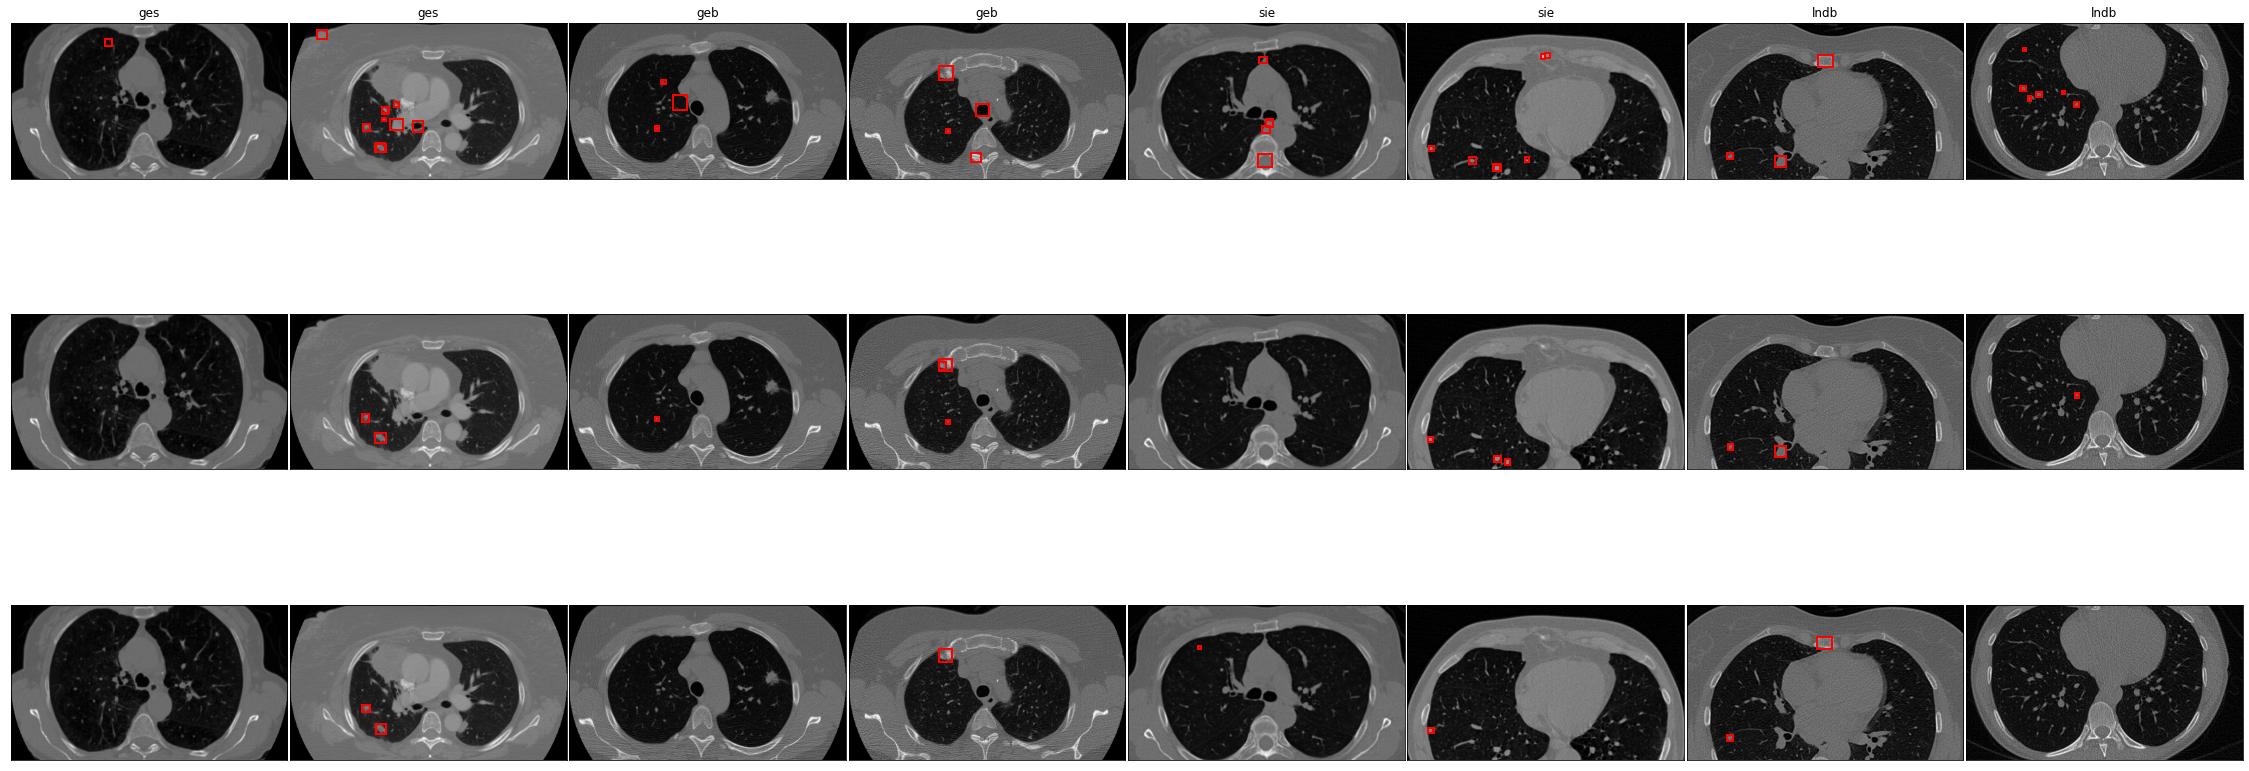

In [13]:
device = torch.device('cuda')
hparams_set = [hparams_lndb_naive, hparams_128_lndb_DM, hparams_128_lndb_PD]

seeds = [1654130, 6654961, 5819225, 1215862, 132054]

fig, ax = plt.subplots(3, 8, figsize=(40, 16))
plt.subplots_adjust(hspace=0.01, wspace=0.01)

iou_thres = 0.3

for i, hparams in enumerate(hparams_set):
    hparams['seed'] = seeds[0]
    hparams['run_postfix'] = 1
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams, training=False)
    model.to(device)
    model.eval()
    
    out = model.forward(x_plt)
    
    for j in range(8):
        print(out[j]['scores'], scanner_plt[j])
        xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[j]['boxes']]

        ax[i][j].imshow(x_plt[j].detach().cpu().numpy()[0])#, vmax=1.0, vmin=0.0)
        for gt in y_plt[j]['boxes']:
            tp = False
            for ab in out[j]['boxes']:
                if (cutils.bb_intersection_over_union(gt, ab))>iou_thres:
                    tp = True
            color = 'lime' if tp else 'yellow'
            rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor=color, facecolor='none')
            ax[i][j].add_patch(rect)
        for k, xy in enumerate(xywh):
            if xy[0]+xy[2]<=280 and xy[1]+xy[3]<=280:
                tp = False
                for gt in y_plt[j]['boxes']:
                    if (cutils.bb_intersection_over_union(gt, out[j]['boxes'][k]))>iou_thres:
                        tp = True
                if not tp:
                    rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
                    ax[i][j].add_patch(rect)
        ax[i][j].set_yticks([])
        ax[i][j].get_xaxis().set_visible(False)
        if i==0:
            ax[i][j].set_title(scanner_plt[j])
#plt.savefig(cutils.RESPATH + 'naturecomm_figures/LN_detection_samples_update.pdf')

In [13]:
fig.savefig(cutils.RESPATH + 'naturecomm_figures/LN_detection_samples_update.pdf')

In [14]:
dl_lndb = DataLoader(LIDCBatch('/project/catinous/lungnodulesfinallndb.csv',
                                      split=['test'], res='lndb', validation=True),
                      batch_size=8,
                      collate_fn=cutils.collate_fn)

In [5]:
device =torch.device('cuda')

model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams_128_lndb_PD, training=False)
model.to(device)
model.eval()
print('.')

expname lidc_cont_lungnodulesfinallndb_basemodel_batch_mem_tf08_1_f7e22510d8
Read: /project/catinous/trained_models/lidc_cont_lungnodulesfinallndb_basemodel_batch_mem_tf08_1_f7e22510d8.pt
.


('lndb', 'lndb', 'lndb', 'lndb', 'lndb', 'lndb', 'lndb', 'lndb')
('/data/dataset/external/LNDb/dicom/LNDb-0102-0233.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0102-0248.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0102-0258.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0102-0236.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0107-0214.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0107-0226.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0107-0115.dcm', '/data/dataset/external/LNDb/dicom/LNDb-0109-0210.dcm')


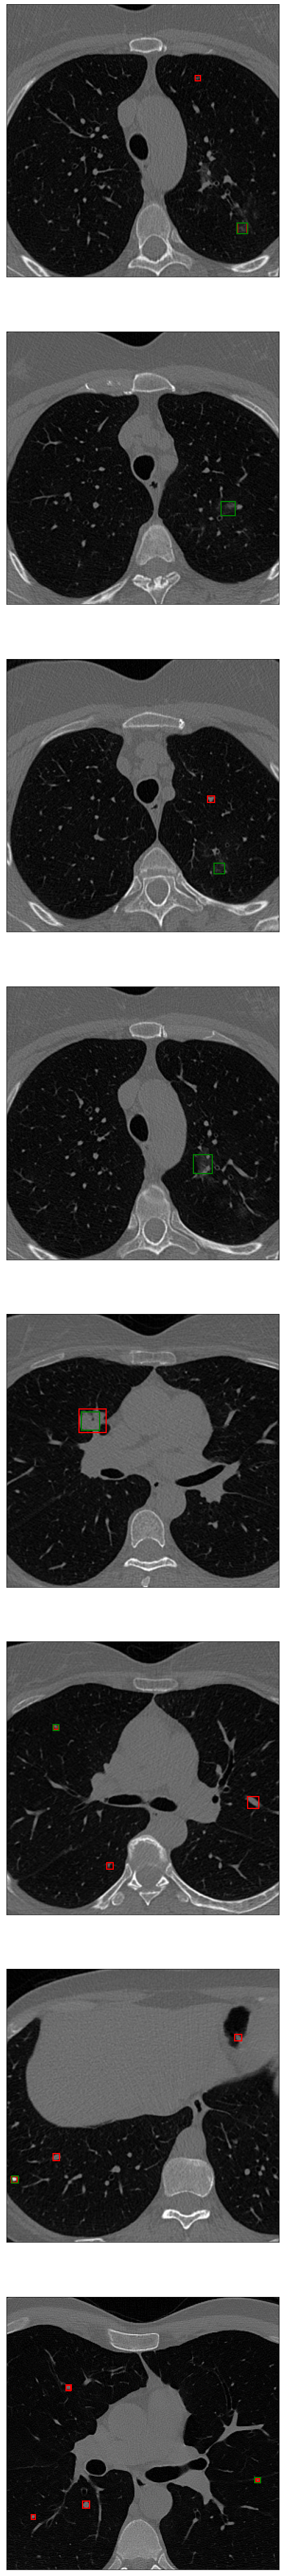

In [15]:
x, y, scanner, filepath = next(iter(dl_lndb))
x = list(i.to(device) for i in x)

print(scanner)
print(filepath)

out = model.forward(x)

fig, ax = plt.subplots(8, 1, figsize=(10, 80))

for i in range(8):
    xywh = [[ab[0], ab[1], ab[2] - ab[0], ab[3] - ab[1]] for ab in out[i]['boxes']]

    ax[i].imshow(x[i].detach().cpu().numpy()[0])
    for k, xy in enumerate(xywh):
        rect = patches.Rectangle((xy[0],xy[1]),xy[2],xy[3],linewidth=2,edgecolor='r',facecolor='none')
        ax[i].add_patch(rect)
    for gt in y[i]['boxes']:
        rect = patches.Rectangle((gt[0], gt[1]), gt[2] - gt[0], gt[3] - gt[1], linewidth=2, edgecolor='g', facecolor='none')
        ax[i].add_patch(rect)
    ax[i].set_yticks([])
    ax[i].get_xaxis().set_visible(False)

In [17]:
filepath

('/data/dataset/external/LungTIME/PND007/1.3.12.2.1107.5.99.2.1315.4.0.1740825721551314/CT.2112.054',
 '/data/dataset/external/LungTIME/PND007/1.3.12.2.1107.5.99.2.1315.4.0.17418539695465656/CT.2112.145',
 '/data/dataset/external/LungTIME/PND057/1.3.12.2.1107.5.99.2.1315.4.0.2008352516954458/CT.18519.119',
 '/data/dataset/external/LungTIME/PND107/1/07_1_148.dcm',
 '/data/dataset/external/LungTIME/PND007/1.3.12.2.1107.5.99.2.1315.4.0.1740825721551314/CT.2112.058',
 '/data/dataset/external/LungTIME/PND107/2/07_2_089.dcm',
 '/data/dataset/external/LungTIME/PND130/2/30_2_062.dcm',
 '/data/dataset/external/LungTIME/PND112/1/12_1_081.dcm')

In [39]:
y[-1]

{'boxes': tensor([[267.8325, 230.3856, 275.8325, 238.3856],
         [212.5719, 282.1997, 220.5719, 290.1997],
         [188.5029, 244.6546, 204.5029, 260.6546]]),
 'labels': tensor([2, 2, 2]),
 'image_id': tensor([38, 38, 38]),
 'area': tensor([ 64.,  64., 256.], dtype=torch.float64),
 'iscrowd': tensor([0, 0, 0])}

In [30]:
pyd.read_file('/data/dataset/external/LungTIME/PND007/1.3.12.2.1107.5.99.2.1315.4.0.1740825721551314/CT.2112.058', force=True).ImageOrientationPatient

[1, 0, 0, 0, 1, 0]

In [23]:
pd.read_csv('/project/catinous/lungnodulesfinallndb.csv').groupby(['patient_id', 'split']).count().sort_values('dataset')

,,dataset,scanner,image,x1,x2,y1,y2,bin_malignancy
patient_id,split,,,,,,,,
LIDC-IDRI-0207,test,1,1,1,1,1,1,1,1
LIDC-IDRI-0372,train,1,1,1,1,1,1,1,1
LIDC-IDRI-0371,val,1,1,1,1,1,1,1,1
LIDC-IDRI-0369,train,1,1,1,1,1,1,1,1
LIDC-IDRI-0363,train,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
288,train,11,11,11,11,11,11,11,11
31,train,11,11,11,11,11,11,11,11
10,test,12,12,12,12,12,12,12,12
